# Group 4 | HW3 (MIS 71545)


Kavya Angara (ka32577), Soumya Agarwal (sa55638), Anudeep Kumar Akkana (aa92799)

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Question 1: Read in data
#### Code and output for Question 1


In [2]:
# reading gold text file into DataFrame and adding column headers
gold_df = pd.read_table("gold.txt",header=None,names=["url", "category"])
  
# reading labels text file into DataFrame and adding column headers
labels_df = pd.read_table("labels.txt",header=None,names=["turk","url", "category"])

# print number of records
print('Number of records in labels df:', len(labels_df))
print('Number of records in gold df:', len(gold_df))

# print gold dataframe
print('\ngold dataframe::')
print(gold_df.head(5))

# print labels dataframe
print('\n\nLabels dataframe::')
print(labels_df.head(5))




Number of records in labels df: 92721
Number of records in gold df: 1517

gold dataframe::
                                      url category
0               http://0800-horoscope.com        G
1                      http://18games.net        X
2                    http://1pixelout.net        G
3  http://1porno.com/004/teens/index.html        X
4   http://1stpussy.com/005/16/index.html        X


Labels dataframe::
             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G
3  A21US576U8SCO4  http://000.cc        G
4  A2LGX47NN7C5D3  http://000.cc        G


### Question 2: Split into two DataFrames
#### Code and output for Question 2

In [3]:
#labels_on_gold will be inner join of labels_df and gold_df
labels_on_gold= labels_df.merge(gold_df, left_on="url", right_on="url",suffixes=('_lbl','_gold'))

#labels_unknown will have the urls from labels_df which are not present in gold_df 
labels_unknown=labels_df[~labels_df["url"].isin(labels_on_gold["url"])]
print('Number of records in labels_on_gold:', len(labels_on_gold))
print('Number of records in labels_unknown:', len(labels_unknown))


Number of records in labels_on_gold: 3324
Number of records in labels_unknown: 89397


### Question 3: Compute accuracies of turks
#### Code and output for Question 3

In [4]:
'''
created a data frame 'rater_goodness' with turk as index and columns as 
the total number of ratings and avg correctness of ratings
'''
rater_goodness = pd.DataFrame(labels_on_gold["turk"].value_counts())
rater_goodness.rename(columns = {'turk':'no_of_ratings'}, inplace = True)
rater_goodness['no_of_matching_ratings']=pd.DataFrame(labels_on_gold[labels_on_gold['category_lbl']==labels_on_gold['category_gold']]["turk"].value_counts())
rater_goodness['avg_correctness_of_rating']=rater_goodness['no_of_matching_ratings']/rater_goodness['no_of_ratings']
rater_goodness=rater_goodness[['no_of_ratings','avg_correctness_of_rating']]
print("rater_goodness dataframe::")
rater_goodness



rater_goodness dataframe::


,no_of_ratings,avg_correctness_of_rating
A31OCN4MNHUQ6W,184,0.777174
A153PKAL7OAY36,148,0.722973
A2BTR0GQ5B5JI6,126,0.523810
ATVALOQVDCMZW,103,0.854369
AZSDW7JJL5VA7,100,0.680000
...,...,...
A33CIJU1XC0YB6,1,1.000000
A2DYHB3BBD3UWQ,1,1.000000
A29JSKSFFWH330,1,NaN
AFHMR93GDJCGT,1,1.000000


### Question 4: Odds ratios
#### Code and output for Question 4

In [5]:
rater_goodness['avg_correctness_of_rating'] = rater_goodness['avg_correctness_of_rating'].replace(np.nan, 0)
rater_goodness['odds']=rater_goodness['avg_correctness_of_rating'] / (1.001 - rater_goodness['avg_correctness_of_rating'])
print("rater_goodness dataframe::")
rater_goodness                                                          
                                                        

rater_goodness dataframe::


,no_of_ratings,avg_correctness_of_rating,odds
A31OCN4MNHUQ6W,184,0.777174,3.472222
A153PKAL7OAY36,148,0.722973,2.600369
A2BTR0GQ5B5JI6,126,0.523810,1.097695
ATVALOQVDCMZW,103,0.854369,5.826657
AZSDW7JJL5VA7,100,0.680000,2.118380
...,...,...,...
A33CIJU1XC0YB6,1,1.000000,1000.000000
A2DYHB3BBD3UWQ,1,1.000000,1000.000000
A29JSKSFFWH330,1,0.000000,0.000000
AFHMR93GDJCGT,1,1.000000,1000.000000


### Question 5: Most accurate turks
#### Code and output for Question 5

In [6]:
# first step is to get turks who rated atleast 20 got set urls
turks_atleast_20=rater_goodness[rater_goodness['no_of_ratings']>=20]
# print the top 10 most accurate turks who have rated at least 20 gold set URLs
turks_atleast_20.sort_values(by='avg_correctness_of_rating',ascending=False).head(10)

,no_of_ratings,avg_correctness_of_rating,odds
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A20PWAB7G3HDHU,20,0.800000,3.980100
A32W20KGQXS0LL,25,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635
A31OCN4MNHUQ6W,184,0.777174,3.472222


### Question 6: Rating counts versus accuracy
#### Code and output for Question 6

#### To answer this question, first we plotted a scatterplot between 'no_of_ratings' and 'avg_correctness_of_rating'.  

<AxesSubplot:xlabel='no_of_ratings', ylabel='avg_correctness_of_rating'>

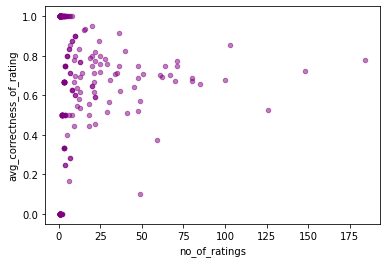

In [7]:
#rater_goodness
rater_goodness.plot.scatter(x='no_of_ratings',y='avg_correctness_of_rating', c='PURPLE',alpha=0.5)

#### By inferring the scatterplot and looking at the datapoints where number of ratings is more, we see that the accuracy is usually high. This suggests that it is 'not' the spammers rather committed and accurate turks who rate lots of URLs. However, considering the entire dataset, it is difficult to establish a relationship between number of ratings by a turker to his or her accuracy.

#### We then tried to find the relationship between number of ratings by a turker to his or her accuracy by linear regression

In [8]:
import statsmodels.api as sm
from patsy import dmatrices 
y, X=dmatrices('avg_correctness_of_rating~no_of_ratings',data= rater_goodness,return_type='dataframe')
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     avg_correctness_of_rating   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                 -0.002
Method:                        Least Squares   F-statistic:                    0.5488
Date:                       Wed, 03 Aug 2022   Prob (F-statistic):              0.459
Time:                               11:24:30   Log-Likelihood:                -94.663
No. Observations:                        269   AIC:                             193.3
Df Residuals:                            267   BIC:                             200.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6431      0.024     27.071      0.000       0.596       0.690
no_of_ratings     0.0007      0.001      0.741      0.459      -0.001       0.002
==============================================================================
Omnibus:                       29.253   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.396
Skew:                          -0.731   Prob(JB):                     6.82e-07
Kurtosis:                       2.373   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Based on the above output, we see that the 'coef' value for 'no_of_rating' is close to 0 and the confidence interval has 0 within it. This strongly suggests that there is no relationship between 'no_of_ratings' and 'average_correctness_of_rating'

### Question 7: Overall predicted odds
#### Code and output for Question 7

In [9]:
#rank the turks in rater_goodness based on number of rating in gold set
rater_goodness_idx_75=rater_goodness.reset_index(inplace=False)
rater_goodness_idx_75.rename(columns = {'index':'turk'}, inplace = True)
rater_goodness_idx_75['rank_prec_75']=rater_goodness_idx_75['no_of_ratings'].rank(pct=True)

#creating a dataframe consisting only the turk who have rated more gold set urls than 75% of all turks
reliable_turk_75=rater_goodness_idx_75[rater_goodness_idx_75['rank_prec_75']>0.75][['turk','odds']]

#calculate overall predicted odds
labels_unknown_for_reliable_turk_75=labels_unknown.merge(reliable_turk_75,left_on="turk",right_on="turk")                                                                
overall_predicted_odds_75=labels_unknown_for_reliable_turk_75.groupby(['url','category']).prod()
overall_predicted_odds_75=overall_predicted_odds_75.reset_index().rename(columns={"odds": "overall_odds"})
overall_predicted_odds_url_idx_75=overall_predicted_odds_75.set_index('url')
print("Dataframe containing url, catergory and overall odds for the of all turks who (a) rated url u as category c\
, and (b) have rated more gold set urls than 75% of all turks who rated at least one gold-set url::")
overall_predicted_odds_url_idx_75


Dataframe containing url, catergory and overall odds for the of all turks who (a) rated url u as category c, and (b) have rated more gold set urls than 75% of all turks who rated at least one gold-set url::


,category,overall_odds
url,,
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,9.914590
http://000relationships.com,P,1.851852
...,...,...
http://zynga.com,G,3.704611
http://zz868.com,G,1.047852
http://zz868.com,P,1.851852


### Question 8: Predicted categories
#### Code and output for Question 8

In [10]:
'''
created a dataframe result_75 where for each URL we are getting top_odds as the max overall odd for that url 
and top_category as the category with top_odds for that url
'''
result_75=overall_predicted_odds_75.groupby('url').apply(lambda x: x.loc[x['overall_odds'].idxmax()])
result_75=result_75[['category','overall_odds']].rename(columns={"category": "top_category","overall_odds":"top_odds"})
print('Dataframe result_75::')
result_75

Dataframe result_75::


,top_category,top_odds
url,,
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,9.914590
http://000vitamins.com,G,3.784982
...,...,...
http://zwinky.com,G,16.141443
http://zylom.com,G,1.735526
http://zynga.com,G,3.704611


### Question 9: Predicted categories using more turks
#### Code and output for Question 9

In [11]:
#rank the turks in rater_goodness based on number of rating in gold set
rater_goodness_idx_25=rater_goodness.reset_index(inplace=False)
rater_goodness_idx_25.rename(columns = {'index':'turk'}, inplace = True)
rater_goodness_idx_25['rank_prec_25']=rater_goodness_idx_25['no_of_ratings'].rank(pct=True)

#craeting a dataframe consisting only the turk who have rated more gold set urls than 25% of all turks
reliable_turk_25=rater_goodness_idx_25[rater_goodness_idx_25['rank_prec_25']>0.25][['turk','odds']]

#calculate overall predicted odds
labels_unknown_for_reliable_turk_25=labels_unknown.merge(reliable_turk_25,left_on="turk",right_on="turk")                                                                
overall_predicted_odds_25=labels_unknown_for_reliable_turk_25.groupby(['url','category']).prod()
overall_predicted_odds_25=overall_predicted_odds_25.reset_index().rename(columns={"odds": "overall_odds"})
overall_predicted_odds_url_idx_25=overall_predicted_odds_25.set_index('url')

'''
created a dataframe result_25 where for each URL we are getting top_odds as the max overall odd for that url 
and top_category as the category with top_odds for that url
'''
result_25=overall_predicted_odds_25.groupby('url').apply(lambda x: x.loc[x['overall_odds'].idxmax()])
result_25=result_25[['category','overall_odds']].rename(columns={"category": "top_category","overall_odds":"top_odds"})
print('Dataframe result_25::')
result_25


Dataframe result_25::


,top_category,top_odds
url,,
http://0-101.net,G,2.155963e+00
http://000.cc,G,2.181050e+03
http://0000.jp,G,2.877556e+07
http://000relationships.com,P,1.851852e+00
http://000vitamins.com,G,5.014149e+00
...,...,...
http://zwinky.com,P,1.000000e+03
http://zylom.com,G,2.873345e+03
http://zynga.com,G,5.442125e+01


In [12]:
#create a cross tab of result_75 and result_25
result_75_25=result_75.merge(result_25,left_on='url',right_on='url',suffixes=('_75','_25'))
crosstab_75_25=pd.crosstab(result_75_25['top_category_75'],result_75_25['top_category_25'])
print('Crosstab with top categories from result 75 and result 25::\n')
print(crosstab_75_25)
print('\n\nNormalized crosstab to check matches::\n')

crosstab_75_25_norm=pd.crosstab(result_75_25['top_category_75'],result_75_25['top_category_25'],normalize='index')
print(crosstab_75_25_norm)

Crosstab with top categories from result 75 and result 25::

top_category_25     G    P    R    X
top_category_75                     
G                8329  563  175  202
P                 180  334   53   15
R                  21   36  130   26
X                  34    9   29  474


Normalized crosstab to check matches::

top_category_25         G         P         R         X
top_category_75                                        
G                0.898587  0.060740  0.018880  0.021793
P                0.309278  0.573883  0.091065  0.025773
R                0.098592  0.169014  0.610329  0.122066
X                0.062271  0.016484  0.053114  0.868132


#### Based on the above results, we can see that Category P has most of the errors as there is only 0.57 match which is less compared to other matches